### Customer Segmentation- Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_excel("Credit Card Customer Data.xlsx")
df.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

In [2]:
df.shape

(660, 7)

In [3]:
df['Customer Key'].nunique()

655

In [4]:
## duplicate rows in dataframe
df[df.duplicated(['Customer Key'])]

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
332    333         47437             17000                   7   
398    399         96929             67000                   6   
432    433         37252             59000                   6   
541    542         50706             60000                   7   
632    633         97935            187000                   7   

     Total_visits_bank  Total_visits_online  Total_calls_made  
332                  3                    1                 0  
398                  2                    2                 2  
432                  2                    1                 2  
541                  5                    2                 2  
632                  1                    7                 0

In [6]:
df=df.drop_duplicates()

In [7]:
df=df.iloc[:,2:]
df.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0            100000                   2                  1   
1             50000                   3                  0   
2             50000                   7                  1   
3             30000                   5                  1   
4            100000                   6                  0   

   Total_visits_online  Total_calls_made  
0                    1                 0  
1                   10                 9  
2                    3                 4  
3                    1                 4  
4                   12                 3

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [9]:
df.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [10]:
df.describe().T

count          mean           std     min      25%  \
Avg_Credit_Limit     660.0  34574.242424  37625.487804  3000.0  10000.0   
Total_Credit_Cards   660.0      4.706061      2.167835     1.0      3.0   
Total_visits_bank    660.0      2.403030      1.631813     0.0      1.0   
Total_visits_online  660.0      2.606061      2.935724     0.0      1.0   
Total_calls_made     660.0      3.583333      2.865317     0.0      1.0   

                         50%      75%       max  
Avg_Credit_Limit     18000.0  48000.0  200000.0  
Total_Credit_Cards       5.0      6.0      10.0  
Total_visits_bank        2.0      4.0       5.0  
Total_visits_online      2.0      4.0      15.0  
Total_calls_made         3.0      5.0      10.0

{'whiskers': [<matplotlib.lines.Line2D at 0x17ce70222d0>,
 'caps': [<matplotlib.lines.Line2D at 0x17c88d43210>,
 'boxes': [<matplotlib.lines.Line2D at 0x17c886ccf50>],
 'medians': [<matplotlib.lines.Line2D at 0x17c88d81e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x17c88d96e90>],
 'means': []}

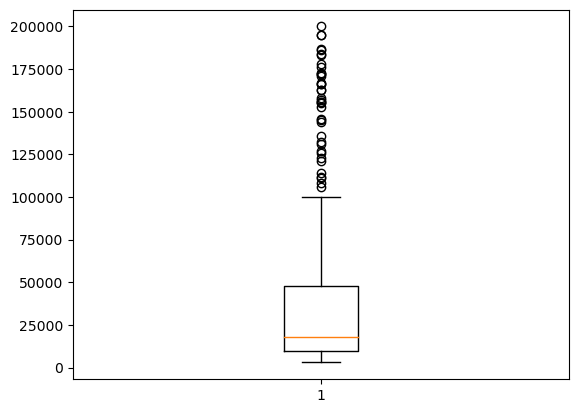

In [11]:
plt.boxplot(df['Avg_Credit_Limit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x17c88e9ced0>,
 'caps': [<matplotlib.lines.Line2D at 0x17c88e9e150>,
 'boxes': [<matplotlib.lines.Line2D at 0x17c88e9c590>],
 'medians': [<matplotlib.lines.Line2D at 0x17c88e9f0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17c88e9f990>],
 'means': []}

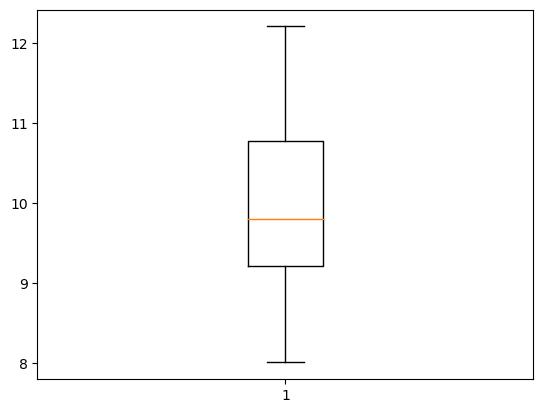

In [12]:
df['Avg_Credit_Limit']=np.log(df['Avg_Credit_Limit'])
plt.boxplot(df['Avg_Credit_Limit'])

C:\Users\nithyalakshmim\AppData\Local\Temp\ipykernel_12084\218844043.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_calls_made'])
C:\Users\nithyalakshmim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total_calls_made', ylabel='Density'>

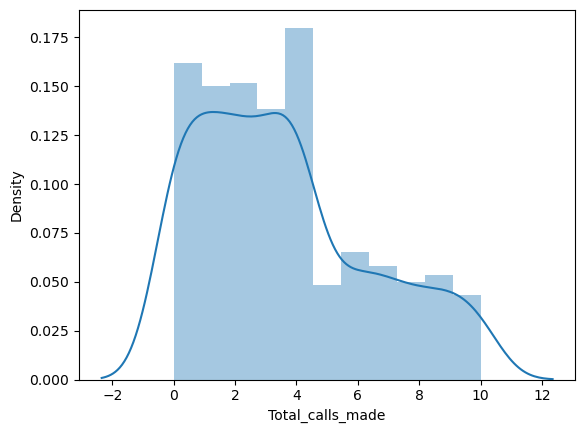

In [13]:
sns.distplot(df['Total_calls_made'])

In [ ]:
##df['Total_visits_online'].replace(0,0.000000001,inplace=True)
#df['Total_visits_online']=np.sqrt(df['Total_visits_online'])
#plt.boxplot(df['Total_visits_online'])


{'whiskers': [<matplotlib.lines.Line2D at 0x17c8cfe4dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x17c88f519d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17c8cfe4450>],
 'medians': [<matplotlib.lines.Line2D at 0x17c8cfe7410>],
 'fliers': [<matplotlib.lines.Line2D at 0x17c8cfe7ed0>],
 'means': []}

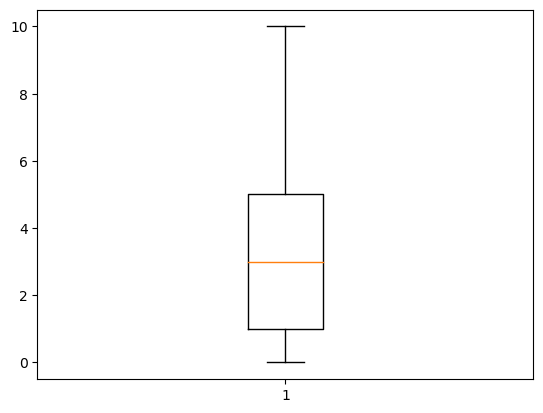

In [14]:
plt.boxplot(df['Total_calls_made'])

In [15]:
## scale/Normalise the data
from scipy.stats import zscore
df_z=df.apply(zscore)
df_z.head()

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          1.630478           -1.249225          -0.860451   
1          0.885387           -0.787585          -1.473731   
2          0.885387            1.058973          -0.860451   
3          0.336281            0.135694          -0.860451   
4          1.630478            0.597334          -1.473731   

   Total_visits_online  Total_calls_made  
0            -0.547490         -1.251537  
1             2.520519          1.891859  
2             0.134290          0.145528  
3            -0.547490          0.145528  
4             3.202298         -0.203739

Univariate Analysis

C:\Users\nithyalakshmim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nithyalakshmim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nithyalakshmim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nithyalakshmim\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

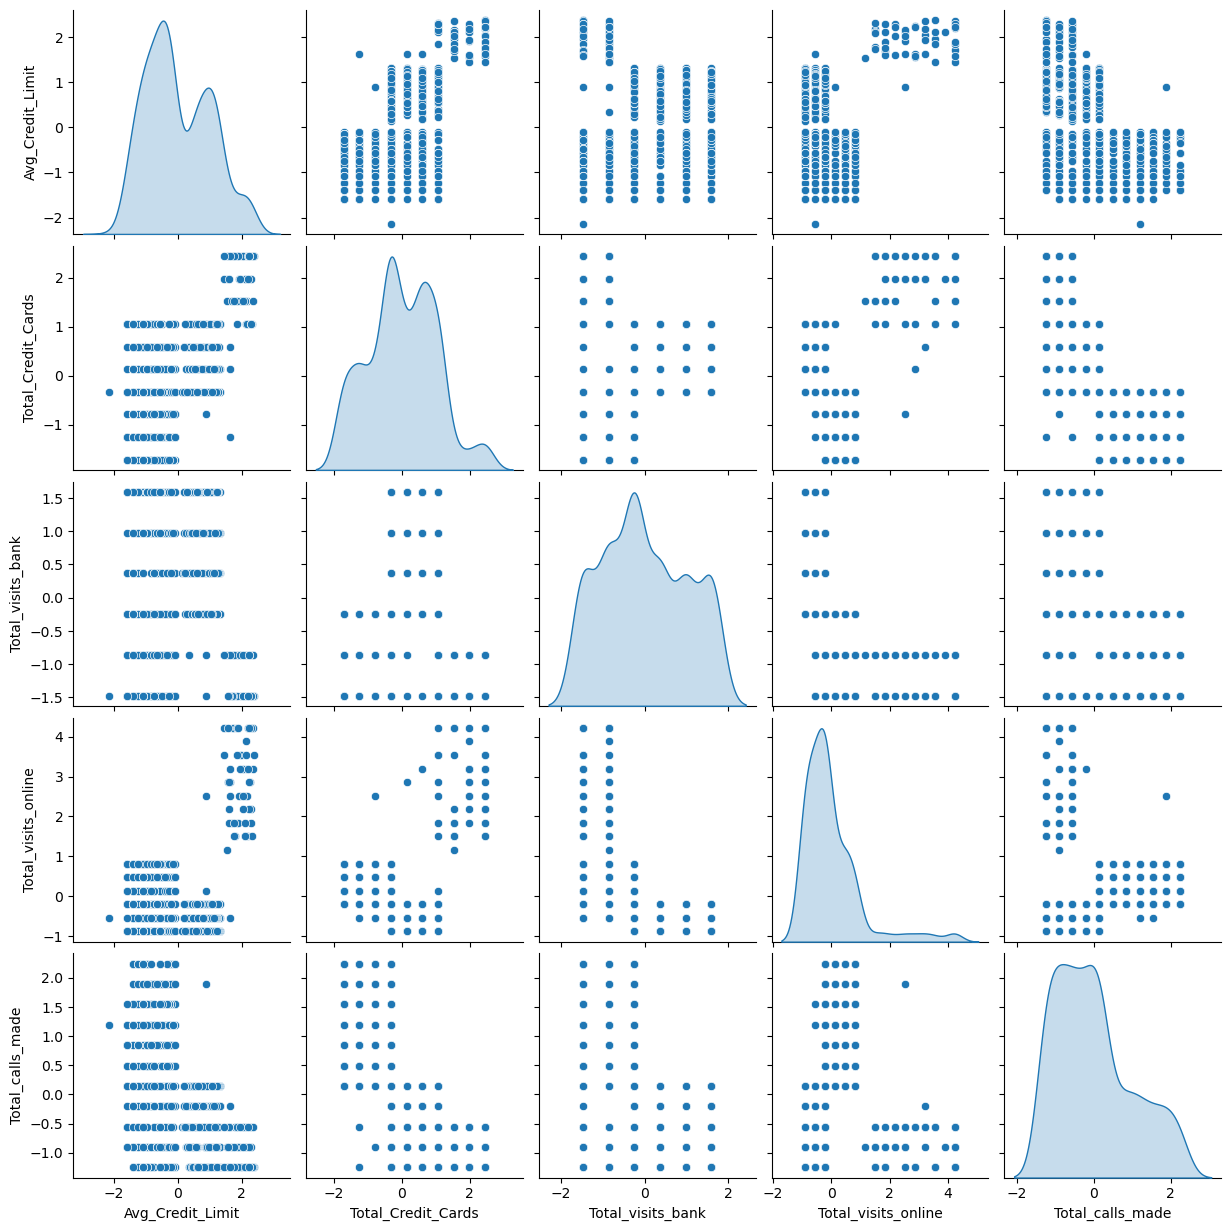

In [16]:
sns.pairplot(df_z,diag_kind='kde')

From the above pairplot, its intuitive to have atleast 4 or 5 clusters


<Axes: >

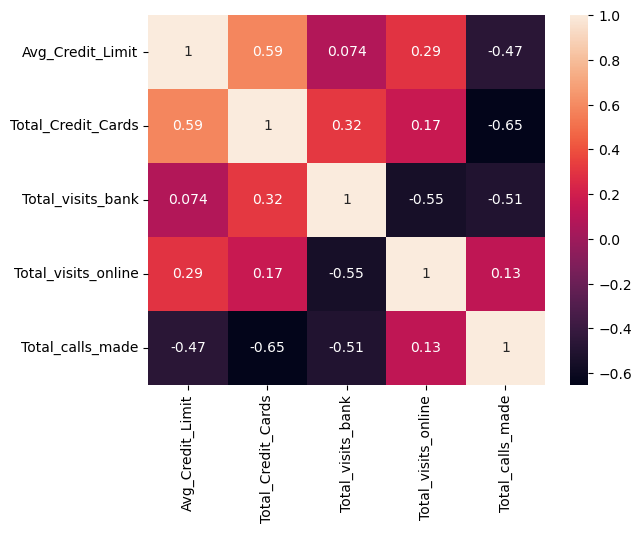

In [17]:
corr_df=df_z.corr()
sns.heatmap(corr_df,annot=True)

The positive relationship between Avg_credit_limit and Total_Credit_Cards is positive, which is obvious that, if the customer has more number of credit cards, then his credit limit is likely to be high.
All other features seems to be reasonably independant of each other

## Unsupervised Learning
## K Means Clustering 

In [18]:
from sklearn.cluster import KMeans
## Finding the optimal k
n_clusters=range(1,18)
cluster_error=[]  #wcss
for cluster in n_clusters:
    k_means=KMeans(cluster,random_state=30)
    k_means.fit(df_z)
    error=k_means.inertia_
    cluster_error.append(error)
    

C:\Users\nithyalakshmim\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\nithyalakshmim\AppData\Local\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\nithyalakshmim\AppData\Local\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nithyalakshmim\AppData\Local\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\nithyalakshmi

Text(0, 0.5, 'Average In-Cluster distortion')

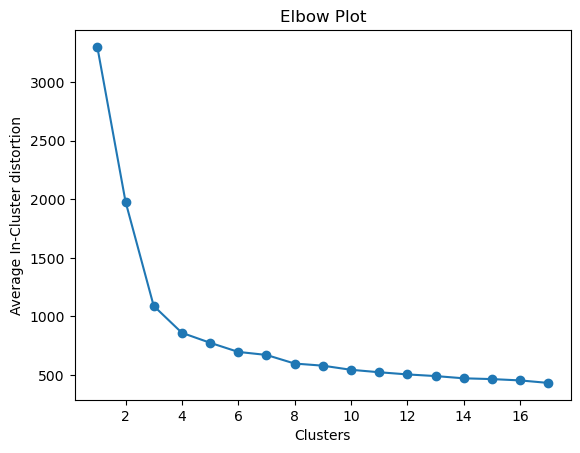

In [19]:
## Elbow plot
plt.plot(n_clusters,cluster_error,marker='o')
plt.title('Elbow Plot')
plt.xlabel("Clusters")
plt.ylabel("Average In-Cluster distortion")

In [31]:
## From the above plot, k=4 or k=5 is optimal
#Lets try with k=4
k_means=KMeans(n_clusters=3,random_state=50,n_init=5)
k_means.fit(df_z)
label=k_means.labels_
centers=k_means.cluster_centers_


In [32]:
## Cluster Centroids
kmeans_center=pd.DataFrame(centers,columns=list(df_z))
kmeans_center.T

0         1         2
Avg_Credit_Limit     0.171814 -0.730991  1.966490
Total_Credit_Cards   0.374308 -1.054310  1.862226
Total_visits_bank    0.668767 -0.898610 -1.105763
Total_visits_online -0.554573  0.320643  2.827319
Total_calls_made    -0.554819  1.143653 -0.874330

In [33]:
## Silhoutte score for KMeans model
from sklearn.metrics import silhouette_score
s_kmeans=silhouette_score(df_z,label)
print(s_kmeans)

0.4930010449995642


In [29]:
range_n_clusters=[2,3,4,5,6,7,8,10,12]
silhouette_avg=[]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters)
    kmeans.fit(df_z)
    cluster_labels=kmeans.labels_
    silhouette_avg.append(silhouette_score(df_z,cluster_labels))

Text(0, 0.5, 'Silhouette score')

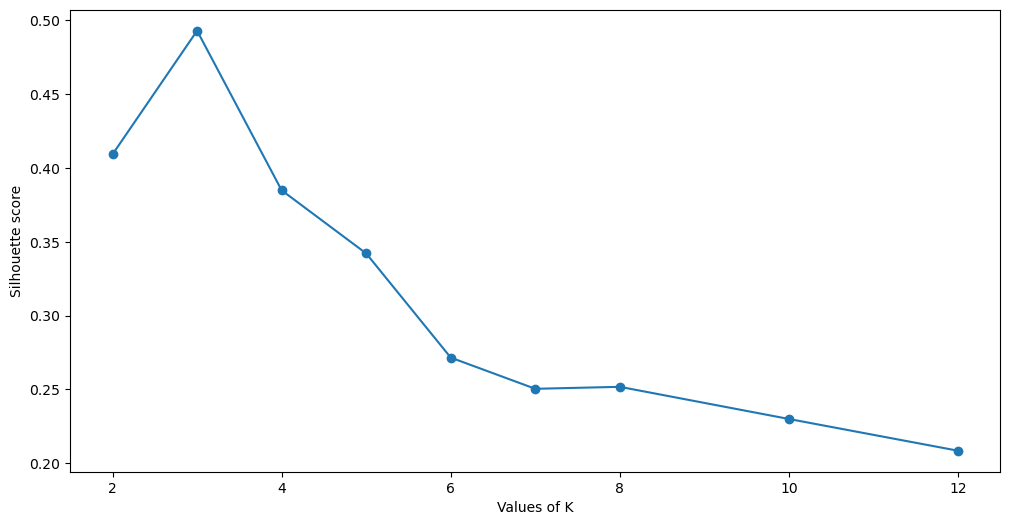

In [30]:
plt.figure(figsize=(12,6))
plt.plot(range_n_clusters,silhouette_avg,marker='o')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')

In [37]:
df_k['Cluster']

0      2
1      1
2      2
3      2
4      3
      ..
655    3
656    3
657    3
658    3
659    3
Name: Cluster, Length: 660, dtype: int32

In [23]:
df_k=df_z.copy()
df_k['Cluster']=label

In [25]:
plt.figure(figsize=(8,5))
df_k['Cluster'].value_counts().plot.bar(color='red')
plt.xlabel("Clusters")
plt.ylabel("Count of Customers")
plt.title("KMeans-Number of Customers in Each Category")
plt.show()

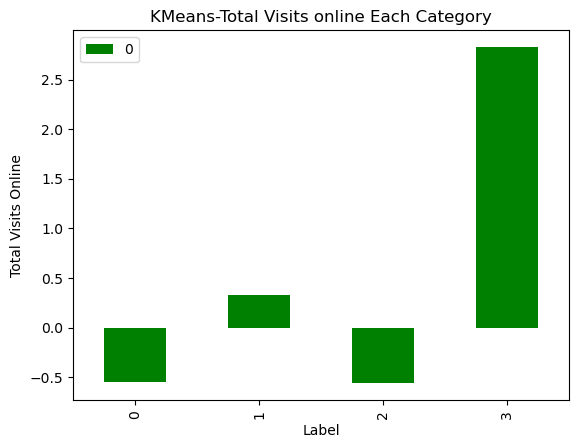

In [34]:
zero = df_k[df_k['Cluster'] == 0].Total_visits_online.mean()
one = df_k[df_k['Cluster'] == 1].Total_visits_online.mean()
two = df_k[df_k['Cluster'] == 2].Total_visits_online.mean()
three = df_k[df_k['Cluster'] == 3].Total_visits_online.mean()


indices = ['0','1','2', '3']
bar = pd.DataFrame([zero, one, two, three], index = indices)
bar.plot.bar(color='green')
plt.xlabel('Label')
plt.ylabel('Total Visits Online')
plt.title("KMeans-Total Visits online Each Category")
plt.show()

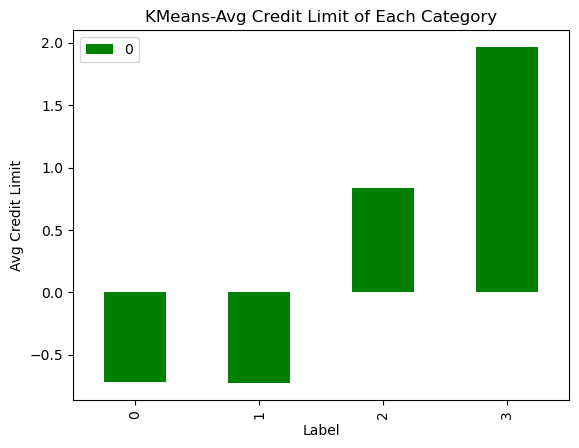

In [35]:
zero = df_k[df_k['Cluster'] == 0].Avg_Credit_Limit.mean()
one = df_k[df_k['Cluster'] == 1].Avg_Credit_Limit.mean()
two = df_k[df_k['Cluster'] == 2].Avg_Credit_Limit.mean()
three = df_k[df_k['Cluster'] == 3].Avg_Credit_Limit.mean()


indices = ['0','1','2', '3']
bar = pd.DataFrame([zero, one, two, three], index = indices)
bar.plot.bar(color='green')
plt.xlabel('Label')
plt.ylabel('Avg Credit Limit')
plt.title("KMeans-Avg Credit Limit of Each Category")
plt.show()

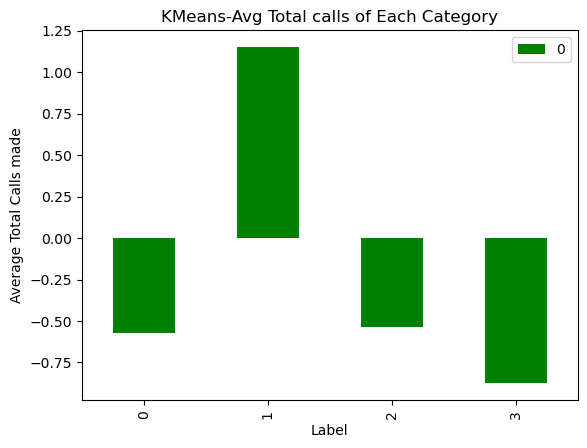

In [36]:
zero = df_k[df_k['Cluster'] == 0].Total_calls_made.mean()
one = df_k[df_k['Cluster'] == 1].Total_calls_made.mean()
two = df_k[df_k['Cluster'] == 2].Total_calls_made.mean()
three = df_k[df_k['Cluster'] == 3].Total_calls_made.mean()


indices = ['0','1','2', '3']
bar = pd.DataFrame([zero, one, two, three], index = indices)
bar.plot.bar(color='green')
plt.xlabel('Label')
plt.ylabel('Average Total Calls made')
plt.title("KMeans-Avg Total calls of Each Category")
plt.show()

HIERARCHICAL CLUSTERING

In [48]:
# Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
model_hier=AgglomerativeClustering(n_clusters=2,linkage='average')
model_hier.fit(df_z)
label=model_hier.labels_
df_hier=df_z.copy()
df_hier['Cluster']=label
df_hier.head()


Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          1.630478           -1.249225          -0.860451   
1          0.885387           -0.787585          -1.473731   
2          0.885387            1.058973          -0.860451   
3          0.336281            0.135694          -0.860451   
4          1.630478            0.597334          -1.473731   

   Total_visits_online  Total_calls_made  Groups  Cluster  
0            -0.547490         -1.251537       2        0  
1             2.520519          1.891859       1        0  
2             0.134290          0.145528       2        0  
3            -0.547490          0.145528       2        0  
4             3.202298         -0.203739       3        1

array([[<Axes: title={'center': 'Avg_Credit_Limit'}, xlabel='[Cluster]'>,
        <Axes: title={'center': 'Groups'}, xlabel='[Cluster]'>,
        <Axes: title={'center': 'Total_Credit_Cards'}, xlabel='[Cluster]'>],
       [<Axes: title={'center': 'Total_calls_made'}, xlabel='[Cluster]'>,
        <Axes: title={'center': 'Total_visits_bank'}, xlabel='[Cluster]'>,
        <Axes: title={'center': 'Total_visits_online'}, xlabel='[Cluster]'>]],
      dtype=object)

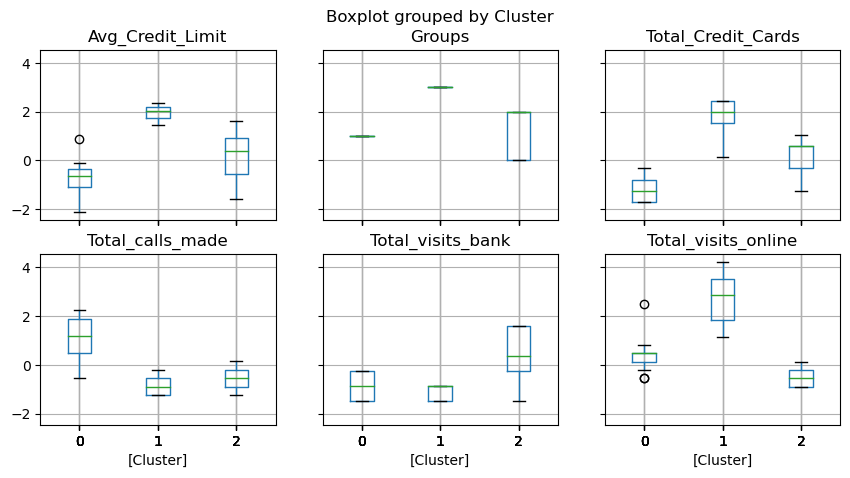

In [43]:
## Analysing the clusters with boxplot

df_hier.boxplot(by='Cluster',layout=(2,3),figsize=(10,5))

In [49]:
## Silhouette score for hierarchical clustering
from sklearn.metrics import silhouette_score
s_hier=silhouette_score(df_z,label,metric='euclidean',random_state=50)
print(s_hier)

0.49469972891064273


In [46]:
## cophenetic coeff
from scipy.cluster.hierarchy import cophenet,linkage,dendrogram
from scipy.spatial.distance import pdist
Z=linkage(df_z,metric='euclidean',method='average')
c,c_dis=cophenet(Z,pdist(df_z))
c

0.89028805741584

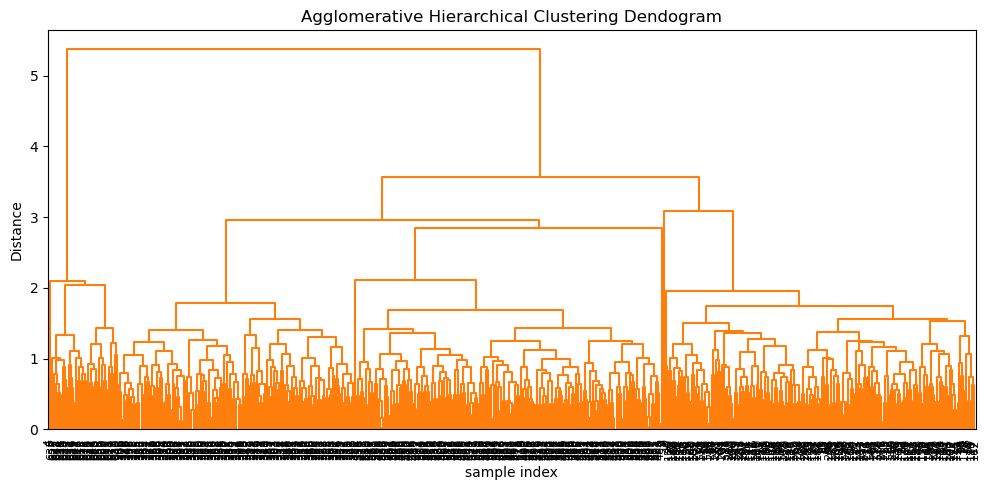

In [47]:
## Dendrogram
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

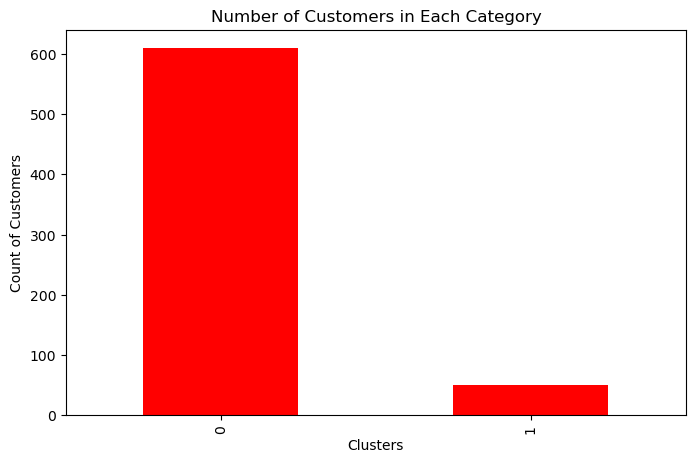

In [50]:
plt.figure(figsize=(8,5))
df_hier['Cluster'].value_counts().plot.bar(color='red')
plt.xlabel("Clusters")
plt.ylabel("Count of Customers")
plt.title("Number of Customers in Each Category")
plt.show()


In [ ]:
## Cluster 0 has the highest number of customers and cluster 3 has the lowest number of customers


In [51]:
## Assigning the labels to the original dataset
df['Cluster']=label

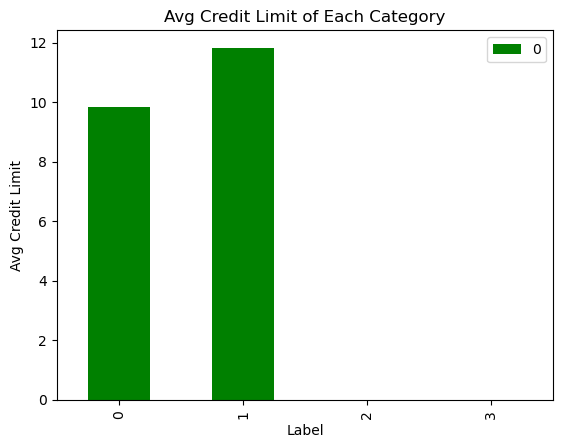

In [52]:
zero = df[df['Cluster'] == 0].Avg_Credit_Limit.mean()
one = df[df['Cluster'] == 1].Avg_Credit_Limit.mean()
two = df[df['Cluster'] == 2].Avg_Credit_Limit.mean()
three = df[df['Cluster'] == 3].Avg_Credit_Limit.mean()


indices = ['0','1','2', '3']
bar = pd.DataFrame([zero, one, two, three], index = indices)
bar.plot.bar(color='green')
plt.xlabel('Label')
plt.ylabel('Avg Credit Limit')
plt.title("Avg Credit Limit of Each Category")
plt.show()

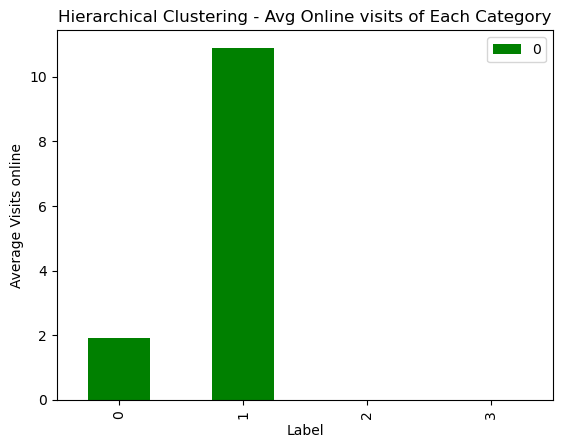

In [53]:
zero = df[df['Cluster'] == 0].Total_visits_online.mean()
one = df[df['Cluster'] == 1].Total_visits_online.mean()
two = df[df['Cluster'] == 2].Total_visits_online.mean()
three = df[df['Cluster'] == 3].Total_visits_online.mean()


indices = ['0','1','2', '3']
bar = pd.DataFrame([zero, one, two, three], index = indices)
bar.plot.bar(color='green')
plt.xlabel('Label')
plt.ylabel('Average Visits online')
plt.title("Hierarchical Clustering - Avg Online visits of Each Category")
plt.show()

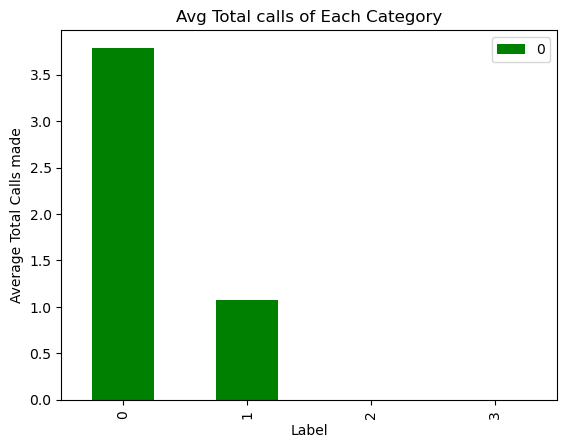

In [54]:
zero = df[df['Cluster'] == 0].Total_calls_made.mean()
one = df[df['Cluster'] == 1].Total_calls_made.mean()
two = df[df['Cluster'] == 2].Total_calls_made.mean()
three = df[df['Cluster'] == 3].Total_calls_made.mean()


indices = ['0','1','2', '3']
bar = pd.DataFrame([zero, one, two, three], index = indices)
bar.plot.bar(color='green')
plt.xlabel('Label')
plt.ylabel('Average Total Calls made')
plt.title("Avg Total calls of Each Category")
plt.show()

### Comparison of KMeans Clusters and Hierarchical Clusters

### Hierarchical Clustering Analysis

Label 3 category has the highest Avg Credit limit and online visits, while the number of customers and total calls made, and  bank visits is the lowest

Label 0 category has the highest Total Calls made, while the average credit limit in label 0 is the lowest and is characterized by second highest number of customers.

Label 1 has the lowest total calls made

Label 2 is characterized by lowest average online visits

### KMeans Clustering Analysis

Label 2 has highest Avg Credit Limit and highest online visits, while the number of customers and total calls made is lowest.

Label 1 has highest total calls made, while lowest Avg Credit Limit and is characterised by highest number of customers.

Label 0 has lowest average total Online visits and high Average Credit Limits

Label 3 has lowest Online visits and highest bank visits



### Key Questions:

#### How many different segments of customers are there?
4 different segments of customers

#### How are these segments different from each other?
The 4 segments are distinct and their profile is below:

Label 0: Lowest Avg Credit limit Customers and make high number of Calls

Label 1: High Credit limit but less total number of Credit Cards and least total number of calls

Label 2: Customers making least Average online visits

Label 3: Highest Avg Credit limit customers and highest total number of credit cards

#### What are your recommendations to the bank on how to better market to and service these customers?
I would recommend the Market research team to focus their personalised Campaigns on Label 1 customers who have high Avg Credit limit but less number of Credit Cards. These potential customers can be targeted to take more credit cards.I would also recommend them to focus on label 0 customers, to improve their credit limit and hence sell more credit cards to them. 

Recommend the Operations and Service team to focus on Label 0 customers, since they make the most number of calls. 




In [55]:
df['Groups']=df_k['Cluster']

In [56]:
df

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0           11.512925                   2                  1   
1           10.819778                   3                  0   
2           10.819778                   7                  1   
3           10.308953                   5                  1   
4           11.512925                   6                  0   
..                ...                 ...                ...   
655         11.502875                  10                  1   
656         11.338572                  10                  1   
657         11.884489                   8                  1   
658         12.055250                  10                  1   
659         12.025749                   9                  0   

     Total_visits_online  Total_calls_made  Cluster  Groups  
0                      1                 0        0       2  
1                     10                 9        0       1  
2                      3                 4        0       2  
3                      1                 4        0       2  
4                     12                 3        1       3  
..                   ...               ...      ...     ...  
655                   10                 0        1       3  
656                   13                 2        1       3  
657                    9                 1        1       3  
658                   15                 0        1       3  
659                   12                 2        1       3  

[660 rows x 7 columns]